# Exploratory Data Analysis on Uber Request Data

<img src="https://blogapi.uber.com/wp-content/uploads/2021/02/TKF_6755-1024x684.jpg" alt="Alt text" title="Title text"/>

Introduction
In this challenge, Santander invites Kagglers to help them identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data they have available to solve this problem.

The data is anonimyzed, each row containing 200 numerical values identified just with a number.

In the following we will explore the data, prepare it for a model, train a model and predict the target value for the test set, then prepare a submission.

Stay tuned, I will frequently update this Kernel in the next days.

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

In [49]:
df = pd.read_csv("Uber Request Data.csv")

In [50]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [52]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [53]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [54]:
df.columns =['request_id','pickup_point','driver_id','status','req_time','drop_time']

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   request_id    6745 non-null   int64  
 1   pickup_point  6745 non-null   object 
 2   driver_id     4095 non-null   float64
 3   status        6745 non-null   object 
 4   req_time      6745 non-null   object 
 5   drop_time     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [56]:
df.req_time = pd.to_datetime(df.req_time)

In [57]:
df.drop_time = pd.to_datetime(df.drop_time)

In [58]:
df.head()

,request_id,pickup_point,driver_id,status,req_time,drop_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [74]:
#Feature engineering
df['req_time_month'] = df.req_time.dt.month
df['req_time_hour'] = df.req_time.dt.time
df['req_time_d_o_w_'] = df.req_time.dt.day_name
df['total_time'] = round(((df.drop_time - df.req_time).dt.total_seconds()) / 60)

In [71]:
df.head()

,request_id,pickup_point,driver_id,status,req_time,drop_time,req_time_month,req_time_hour,req_time_d_o_w_,total_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,11:51:00,<bound method PandasDelegate._add_delegate_acc...,69.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,11,17:57:00,<bound method PandasDelegate._add_delegate_acc...,50.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,12,09:17:00,<bound method PandasDelegate._add_delegate_acc...,41.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,12,21:08:00,<bound method PandasDelegate._add_delegate_acc...,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7,08:33:16,<bound method PandasDelegate._add_delegate_acc...,53.0


In [86]:
df = df[(df.total_time > 0) & (df.total_time < 150)]

In [88]:
df.shape

(2799, 10)

<AxesSubplot:xlabel='total_time', ylabel='Count'>

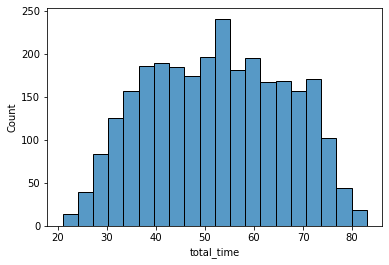

In [91]:
sns.histplot(x=df.total_time,bins=20)